# Project - Write a Data Science Blog Post
In this project, I decided to look at Seattle Airbnb Dataset. As part of the Airbnb Inside initiative, the dataset describes the listing activity of homestays in Seattle, WA. 

To answer below questions in a structured format I will use the CRISP-DM process, which is a cross industry process for data mining:

$.$ What are the most common amenities in the listings?
<br>
$.$ What attracts the guests most for renting a property?
<br>
$.$ What are the most significant features of the dataset to estimate the price of a listing?
<br>
$.$ What are the Top positive and negative impacted features to predict price??
<br>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline

In [94]:
listingsDF = pd.read_csv('listings.csv')

In [95]:
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [97]:
print(listingsDF.shape)

(3818, 92)


In [98]:
listingsDF.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [99]:
listingsDF.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [101]:
#to get number of nulls in each column in descending order
listingsDF.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

## What are the most common amenities in the listings?

In [103]:
amenitiesLst = []
for i in range(len(df_lis)):
    amenitiesLst.append(df_lis['amenities'][i])

amenitiesLst = list((s.strip('\'\{\}') for s in amenitiesLst))
amenitiesLstToStr = ",".join(amenitiesLst)
amenitiesLst = list(set(amenitiesLstToStr.split(",")))

amenitiesNonEmptyLst = []
for string in amenitiesLst:
    if (string != ""):
        amenitiesNonEmptyLst.append(string)
amenitiesLst = amenitiesNonEmptyLst

In [104]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

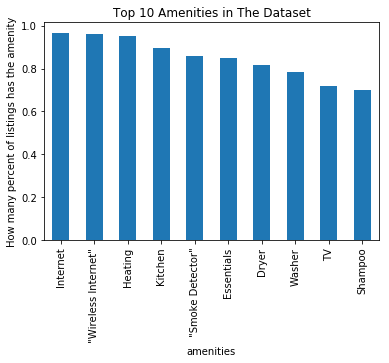

In [106]:
study = listingsDF['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', amenitiesLst)
study_df.set_index('amenities', inplace=True)

#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(listingsDF))[:10].plot(kind='bar', legend=None);
plt.title('Top 10 Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')

plt.show()

## Insights for the question "What are the most common amenities in the listings?"
In the above chart you can see that the most common amenities in Seattle listings are:

Internet
<br>
Wireless Internet
<br>
Heating
<br>
Smoke Detector
<br>
Essentials

## What attracts the guests most for renting a property?

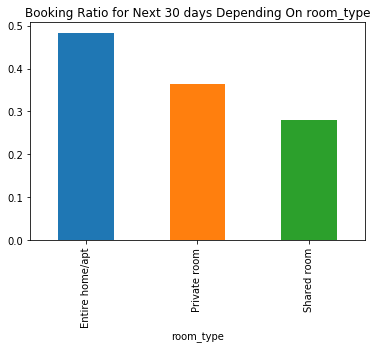

In [111]:
listingsDF['booking_ratio_30'] = 1 - (listingsDF['availability_30']/30)
listingsDF.groupby(['room_type'])['booking_ratio_30'].mean().sort_values(ascending=False).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 days Depending On room_type');
plt.show()

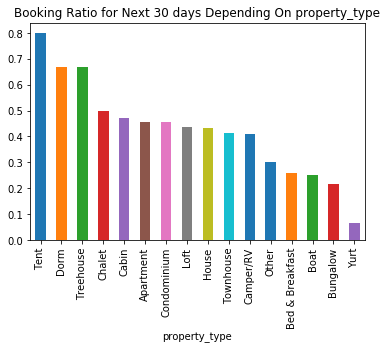

In [112]:
(listingsDF.groupby(['property_type'])['booking_ratio_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 days Depending On property_type');
plt.show()

In [113]:
for i in range(len(amenitiesLst)):
    listingsDF[amenitiesLst[i]] = 0

In [114]:
for i in range(len(amenitiesLst)):
    for t in range(len(listingsDF)):
        if amenitiesLst[i] in listingsDF['amenities'][t]:
            listingsDF.loc[t , amenitiesLst[i]] = 1
        else:
            listingsDF.loc[t , amenitiesLst[i]] = 0

In [115]:
amenities_importance = pd.DataFrame(index=range(0,len(amenitiesLst)), columns = ["Amenity_Name", "Booking Ratio for HAVING the Amenity", "Booking Ratio for NOT HAVING the Amenity", "Booking Difference"])
for i in range(len(amenitiesLst)):
    amenities_importance['Amenity_Name'][i] = amenitiesLst[i]
    amenities_importance['Booking Ratio for HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_ratio_30'].mean()[1]
    amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i] = df_lis.groupby([list_of_amenities[i]])['booking_ratio_30'].mean()[0]
    amenities_importance['Booking Difference'][i] = amenities_importance['Booking Ratio for HAVING the Amenity'][i] - amenities_importance['Booking Ratio for NOT HAVING the Amenity'][i]

amenities_importance.set_index('Amenity_Name', inplace=True)

In [116]:
amenities_importance.sort_values(by='Booking Difference', ascending = False)[:5]

,Booking Ratio for HAVING the Amenity,Booking Ratio for NOT HAVING the Amenity,Booking Difference
Amenity_Name,,,
"""Washer / Dryer""",0.616667,0.440365,0.176302
Kitchen,0.451154,0.347764,0.10339
Cat(s),0.486649,0.435322,0.0513271
"""Pets Allowed""",0.47959,0.434937,0.0446532
"""Other pet(s)""",0.48366,0.439873,0.0437876


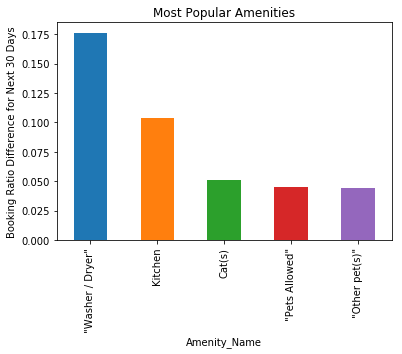

In [117]:
amenities_importance['Booking Difference'].sort_values(ascending = False)[:5].plot(kind='bar', legend=None)
plt.title('Most Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

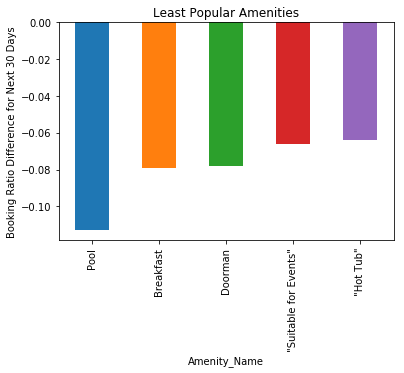

In [118]:
amenities_importance['Booking Difference'].sort_values(ascending = True)[:5].plot(kind='bar', legend=None)
plt.title('Least Popular Amenities');
plt.ylabel('Booking Ratio Difference for Next 30 Days')
plt.show()

## Insights for the question "What attracts the guests most for renting a property?"
<br>
Having Washer/Dryer,kitchen and allowing pets are good ideas for increasing the popularity for a listing.
<br>
Also when comparing different room_types, an "Entire home/apt" is more popular than a private room or a shared room. 
<br>
Also having a pool or serving breakfast does not help a listing to be preferred, probably because of the increased price with these amenities.

## What are the most significant features of the dataset to estimate the price of a listing?

In [126]:
#Identified below important features manually for estimating the price of a listing

features_of_interest = ['bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude','reviews_per_month',
        'booking_ratio_30', 'accommodates', 'guests_included', '"24-Hour Check-in"', '"Suitable for Events"',
       '"Pets live on this property"', 'Dog(s)', '"Smoking Allowed"',
       '"Other pet(s)"', 'Essentials', '"Wireless Internet"',
       '"Buzzer/Wireless Intercom"', 'TV', 'Gym', 'Washer', 'Doorman', 'Dryer',
       '"Hot Tub"', '"Air Conditioning"', '"Pets Allowed"', 'Pool',
       '"Hair Dryer"', '"Fire Extinguisher"', 'Breakfast', '"Washer / Dryer"',
       '"Laptop Friendly Workspace"', '"Free Parking on Premises"',
       '"Lock on Bedroom Door"', 'Cat(s)', 'Hangers', '"Family/Kid Friendly"',
       '"Carbon Monoxide Detector"', '"Safety Card"', 'Kitchen',
       '"Elevator in Building"', 'Internet', 'Shampoo', '"Smoke Detector"',
       '"Wheelchair Accessible"', 'Iron', '"First Aid Kit"',
       '"Indoor Fireplace"', '"Cable TV"', 'Heating', 'host_is_superhost', 'neighbourhood_group_cleansed',
        'property_type','room_type','bed_type','price','security_deposit',
        'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']

listingsTopFeaDF = listingsDF[features_of_interest]

In [127]:
#Inorder to include these features in a ML algorithm we need to mutute any of the null values.
listingsTopFeaDF.isnull().sum()[listingsTopFeaDF.isnull().sum()>0]

bathrooms              16
bedrooms                6
beds                    1
reviews_per_month     627
host_is_superhost       2
property_type           1
security_deposit     1952
cleaning_fee         1030
dtype: int64

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
#Identified below features has null values and mutated these values using mean(),mode() and fill
listingsTopFeaDF['bathrooms'].fillna(listingsTopFeaDF['bathrooms'].mean(), inplace=True)
listingsTopFeaDF['bedrooms'].fillna(listingsTopFeaDF['bedrooms'].mean(), inplace=True)
listingsTopFeaDF['beds'].fillna(listingsTopFeaDF['beds'].mean(), inplace=True)
listingsTopFeaDF['reviews_per_month'].fillna(listingsTopFeaDF['reviews_per_month'].mean(), inplace=True)
listingsTopFeaDF['host_is_superhost'].fillna(listingsTopFeaDF['host_is_superhost'].mode()[0], inplace=True)
listingsTopFeaDF['property_type'].fillna(listingsTopFeaDF['property_type'].mode()[0], inplace=True)
listingsTopFeaDF['security_deposit'].fillna(0, inplace=True)
listingsTopFeaDF['cleaning_fee'].fillna(0, inplace=True)

In [130]:
listingsTopFeaDF['price'] = listingsTopFeaDF['price'].str.replace('$', '')
listingsTopFeaDF['security_deposit'] = listingsTopFeaDF['security_deposit'].str.replace('$', '')
listingsTopFeaDF['cleaning_fee'] = listingsTopFeaDF['cleaning_fee'].str.replace('$', '')
listingsTopFeaDF['extra_people'] = listingsTopFeaDF['extra_people'].str.replace('$', '')

listingsTopFeaDF['price'] = listingsTopFeaDF['price'].str.replace(',', '')
listingsTopFeaDF['security_deposit'] = listingsTopFeaDF['security_deposit'].str.replace(',', '')
listingsTopFeaDF['cleaning_fee'] = listingsTopFeaDF['cleaning_fee'].str.replace(',', '')
listingsTopFeaDF['extra_people'] = listingsTopFeaDF['extra_people'].str.replace(',', '')

#Removing $ and , signs made 0 (zero) values NaN again. So I have to fillna with 0 again. 
listingsTopFeaDF['security_deposit'].fillna(0, inplace=True)
listingsTopFeaDF['cleaning_fee'].fillna(0, inplace=True)

In [131]:
#All the features should be in numeric type 
listingsTopFeaDF['price'] = listingsTopFeaDF['price'].astype(float)
listingsTopFeaDF['security_deposit'] = listingsTopFeaDF['security_deposit'].astype(float)
listingsTopFeaDF['cleaning_fee'] = listingsTopFeaDF['cleaning_fee'].astype(float)
listingsTopFeaDF['extra_people'] = listingsTopFeaDF['extra_people'].astype(float)

In [132]:
listingsTopFeaDF.dtypes

bathrooms                       float64
bedrooms                        float64
beds                            float64
latitude                        float64
longitude                       float64
reviews_per_month               float64
booking_ratio_30                float64
accommodates                      int64
guests_included                   int64
"24-Hour Check-in"                int64
"Suitable for Events"             int64
"Pets live on this property"      int64
Dog(s)                            int64
"Smoking Allowed"                 int64
"Other pet(s)"                    int64
Essentials                        int64
"Wireless Internet"               int64
"Buzzer/Wireless Intercom"        int64
TV                                int64
Gym                               int64
Washer                            int64
Doorman                           int64
Dryer                             int64
"Hot Tub"                         int64
"Air Conditioning"                int64


In [133]:
cat_cols = listingsTopFeaDF.select_dtypes(include=['object'])

In [134]:
cat_cols.head()

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bed_type,instant_bookable,cancellation_policy
0,f,Queen Anne,Apartment,Entire home/apt,Real Bed,f,moderate
1,t,Queen Anne,Apartment,Entire home/apt,Real Bed,f,strict
2,f,Queen Anne,House,Entire home/apt,Real Bed,f,strict
3,f,Queen Anne,Apartment,Entire home/apt,Real Bed,f,flexible
4,f,Queen Anne,House,Entire home/apt,Real Bed,f,strict


In [135]:
#using get_dummies we can create multiple columns for each category

In [136]:
for col in cat_cols:
    try:
        listingsTopFeaDF = pd.concat([listingsTopFeaDF.drop(col, axis=1), pd.get_dummies(listingsTopFeaDF[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue

In [137]:
listingsTopFeaDF.isnull().sum().sort_values(ascending=False)

cancellation_policy_strict                          0
Cat(s)                                              0
"Pets Allowed"                                      0
Pool                                                0
"Hair Dryer"                                        0
"Fire Extinguisher"                                 0
Breakfast                                           0
"Washer / Dryer"                                    0
"Laptop Friendly Workspace"                         0
"Free Parking on Premises"                          0
"Lock on Bedroom Door"                              0
Hangers                                             0
"Hot Tub"                                           0
"Family/Kid Friendly"                               0
"Carbon Monoxide Detector"                          0
"Safety Card"                                       0
Kitchen                                             0
"Elevator in Building"                              0
Internet                    

In [138]:
y = listingsTopFeaDF['price']
X = listingsTopFeaDF.drop(columns='price')

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

In [140]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.596483560422289


In [141]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_df = coef_weights(lm_model.coef_, X_train)

In [142]:
coef_df.head()

,est_int,coefs,abs_coefs
77,property_type_Dorm,-239.117491,239.117491
71,property_type_Boat,123.618412,123.618412
3,latitude,-75.980576,75.980576
86,room_type_Shared room,-73.416468,73.416468
74,property_type_Camper/RV,53.888345,53.888345


In [143]:
def find_optimal_number_of_selectors(X, y, k_samples, plot=True):
    '''
    INPUT:
    X dataframe that contains the features.
    y dataframe that contains the variable to be predicted.
    k_samples is a list of k values that will be tested.
    
    OUTPUT:
    A dictionary that contains values of tested k-values as keys and r-squared values for each key.
    The k-value that has the highest r-squared.

    '''   
    result_r_squareds = []
    results = {}
    for kes in k_samples:
        selector = SelectKBest(score_func=f_regression, k=kes)
        selector.fit_transform(X, y)
        selected_cols = selector.get_support(indices=True)
        features_new_X = X.iloc[:,selected_cols]
        
        X_train, X_test, y_train, y_test = train_test_split(features_new_X, y, test_size = 0.2, random_state=42)
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        result_r_squareds.append(r2_score(y_test, y_test_preds))
        results[str(kes)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(k_samples, result_r_squareds, label="r-squared", alpha=0.5)
        plt.xlabel("Different k_values")
        plt.ylabel("R_Squared_Values")
        plt.legend(loc=1)
        plt.show()
    
    best_k = max(results, key=results.get)
    
    return results, best_k

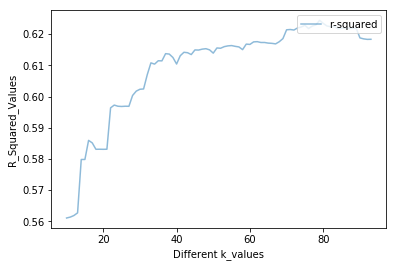

{'10': 0.5610719934185298, '11': 0.5613631161773545, '12': 0.5618706404225704, '13': 0.5627192753466563, '14': 0.5798179780206143, '15': 0.5798260185879054, '16': 0.5859423320366868, '17': 0.5851382220911276, '18': 0.5830889041071929, '19': 0.5831087206719212, '20': 0.5830826716960481, '21': 0.5831107940544076, '22': 0.5963593970815535, '23': 0.5972542455699521, '24': 0.5968826231621436, '25': 0.5968069326103846, '26': 0.5968841784629724, '27': 0.5968631459356524, '28': 0.6003294350498085, '29': 0.6017226468717207, '30': 0.6023189756307836, '31': 0.6024150140594338, '32': 0.606977936231148, '33': 0.6107747907289518, '34': 0.6103742896077491, '35': 0.6114487579913678, '36': 0.6114166183813408, '37': 0.613722973080196, '38': 0.6135929076595791, '39': 0.6124991835786586, '40': 0.61040628209557, '41': 0.6130624963208635, '42': 0.6141644667037673, '43': 0.6140255891359943, '44': 0.6134345497904745, '45': 0.6149222913789423, '46': 0.6148767047130215, '47': 0.6151736281808575, '48': 0.6153163

In [144]:
k_samples = range(10, len(X.columns))
emre_results, emre_best_k = find_optimal_number_of_selectors(X, y, k_samples)
print(emre_results)
print(emre_best_k)
print(emre_results[emre_best_k])

The highest r-squared value is achieved with 78 features and the r-squared value is 62%

## What are the Top positive and negative impacted features to predict price?

In [157]:
coef_df.sort_values(by=['coefs'], ascending=False)[:5]

,est_int,coefs,abs_coefs
69,property_type_Boat,124.637492,124.637492
72,property_type_Camper/RV,56.971664,56.971664
81,property_type_Treehouse,42.160932,42.160932
14,"""Wireless Internet""",42.146079,42.146079
77,property_type_Loft,33.654266,33.654266


### Based on coeffiencent value property_type_Boat,property_type_Camper,property_type_Treehouse, Wireless Internet,property_type_Loft has a Positive impact on Price

In [158]:
coef_df.sort_values(by=['coefs'], ascending=True)[:5]

,est_int,coefs,abs_coefs
75,property_type_Dorm,-238.879737,238.879737
84,room_type_Shared room,-74.098674,74.098674
39,Internet,-46.693737,46.693737
83,room_type_Private room,-35.455937,35.455937
56,neighbourhood_group_cleansed_Delridge,-25.385954,25.385954


### Based on coeffiencent value property_type_Dorm,room_type_Shared,Internet,room_type_Private, neighbourhood_group_cleansed_Delridge has a negative impact on Price